In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings
filterwarnings('ignore')
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# print("Added shopping_cart.png for wordcloud")

# **Data Overview** <a id="1"></a>

In [2]:
file="Reviews.csv"
data= pd.read_csv(file)
print(data.shape)

(334119, 31)


In [3]:
data.describe()

,Unnamed: 0,ï»¿,ratings_overall,labels,likeCount,latitude,longitude,primary_cuisine_id,review_number,restaurant_overall_rating
count,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000
mean,167059.000000,168411.559947,2.817562,1.916958,0.241884,23.668077,90.623229,127.527136,4014.909981,3.841418
std,96451.991633,96817.799309,1.684886,0.935649,0.629411,0.528833,0.528335,54.243513,5812.797803,0.445709
min,0.000000,0.000000,1.000000,1.000000,-2.000000,22.269991,90.210323,0.000000,0.000000,0.000000
25%,83529.500000,84763.500000,1.000000,1.000000,0.000000,23.741879,90.371986,85.000000,488.000000,3.600000
50%,167059.000000,168499.000000,3.000000,2.000000,0.000000,23.773776,90.405709,86.000000,1584.000000,3.900000
75%,250588.500000,252235.500000,5.000000,3.000000,0.000000,23.810406,90.425728,193.000000,4697.000000,4.100000
max,334118.000000,335947.000000,5.000000,3.000000,51.000000,24.919806,91.910593,249.000000,32993.000000,5.000000


<h2> Now we can visualize Category</h2>

In [4]:
print(len(max(data['text'],key=len)))
print(len(min(data['text'],key=len)))

366
3


# **NLP Processing** <a id="3"></a>

In [5]:
import nltk
import re
import time
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
t = time.time()

def leadMyWord(text):
    text = text.lower()
    
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don t", "do not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"didn t", "did not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"won t", "will not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"isn t", "is not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"aren t", "are not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"wasn t", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"weren t", "were not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"haven t", "have not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hadn t", "had not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"couldn t", "could not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"shouldn t", "should not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"can t", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"it s", "it is", text)
    text = re.sub(r"kebab", "kabab", text)
    text = re.sub(r"nun", "naan", text)
    text = re.sub(r"nan", "naan", text)
    text = re.sub('[^a-zA-Z]'," ",text)
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text= re.sub('\s{2,}', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
#     print(text)
    text = "".join(text)
#     text = [word for word in text.split() if word not in stopword]
# #     print(text,"f2nd")
#     text = " ".join(text)
#     print(text,"last")
    return text   
textList = data.text.apply(leadMyWord)
print("Before")
print(data["text"][2])
data['text'] = data.text.apply(leadMyWord)
# data['clean_data']=textList
textList = list(textList)
# data
print("After")
print(textList[2])
print("Time Passed")
print(time.time()-t)

Before
food average but their desert booter halwa and pudding is very good
After
food average but their desert booter halwa and pudding is very good
Time Passed
23.624879598617554


In [6]:
data.loc[1:15, ['text','reviewerName', 'ratings_overall','labels']]

,text,reviewerName,ratings_overall,labels
1,very small in amount,MOON,2,1
2,food average but their desert booter halwa and...,SALMAN,3,2
3,fresh and tasty,GOLAM,5,3
4,everything i ordered was good,FERZANA,4,3
5,kalo jira vhorta balu vhorta not recommended b...,FERZANA,1,1
6,quantity of dal should be little more otherwis...,FERZANA,4,3
7,beef was too poor in size quantity aganist pri...,DEDAR,3,2
8,chicken was not up to the mark and lotpoti was...,IFTEKHER,5,3
9,lot of sand in kali jeers bortha,MOHAMMAD,4,3
10,bad,MOHAMMAD,1,1


In [7]:
for i in range(200):
    print(textList[i])


too much small amount
very small in amount
food average but their desert booter halwa and pudding is very good
fresh and tasty
everything i ordered was good
kalo jira vhorta balu vhorta not recommended baki shob valo chilo 
quantity of dal should be little more otherwise everything was good specially beef 
beef was too poor in size quantity aganist price but test was good 
chicken was not up to the mark and lotpoti was full of potato alu bhorta did not seem fresh 
lot of sand in kali jeers bortha
bad
very good food i chose this home kitchen randomly but really got a food and packaging please always maintain the same standard allah bless you with all the sucess 
honestly eating today s beef ribs and dal felt like i was eating my own food no extra colors or anything else very nice homemade food and it would be great if you could do it a little sooner 
i ate good food after a long time the food was fresh it was fun if only i could give so much suggestion if i could increase the quantity o

In [8]:
for i in range(200):
    print(data["text"][i])

too much small amount
very small in amount
food average but their desert booter halwa and pudding is very good
fresh and tasty
everything i ordered was good
kalo jira vhorta balu vhorta not recommended baki shob valo chilo 
quantity of dal should be little more otherwise everything was good specially beef 
beef was too poor in size quantity aganist price but test was good 
chicken was not up to the mark and lotpoti was full of potato alu bhorta did not seem fresh 
lot of sand in kali jeers bortha
bad
very good food i chose this home kitchen randomly but really got a food and packaging please always maintain the same standard allah bless you with all the sucess 
honestly eating today s beef ribs and dal felt like i was eating my own food no extra colors or anything else very nice homemade food and it would be great if you could do it a little sooner 
i ate good food after a long time the food was fresh it was fun if only i could give so much suggestion if i could increase the quantity o

#  RandomOversampling

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE
from collections import Counter

texts = textList  # List of text samples
labels = data['ratings_overall']  # List of corresponding class labels (e.g., integers)

# Check the distribution of class labels
class_distribution = dict(Counter(labels))
print("Original Class Distribution:", class_distribution)

texts_train = np.array(texts).reshape(-1, 1)
labels_train = np.array(labels)
desired_ratio = 0.1

over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

texts_resampled, labels_resampled = over_sampler.fit_resample(texts_train, labels_train)


class_distribution = dict(Counter(labels_resampled))
print("Original Class Distribution:", class_distribution)



Original Class Distribution: {2: 33866, 3: 39315, 5: 94199, 4: 39330, 1: 127409}
Original Class Distribution: {2: 127409, 3: 127409, 5: 127409, 4: 127409, 1: 127409}


In [10]:
#preparing y

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit_transform(labels_resampled)
print("LabelEncode")
print(labelEncode)
categorical_y = to_categorical(labelEncode)
print("To_Categorical")
print(categorical_y)

LabelEncode
[1 1 2 ... 4 4 4]
To_Categorical
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


texts_resampled

In [11]:
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences

from nltk import word_tokenize
#preparing x for CNN
MAX_FEATURES = 48000


onehot_corpus = [one_hot(' '.join(text), MAX_FEATURES) for text in texts_resampled]

    
maxTextLen = 0
for text in textList:
#     print(text)
    word_token=word_tokenize(text)
    if(maxTextLen < len(word_token)):
        maxTextLen = len(word_token)
        
print("Max number of words : ",maxTextLen)
print("Max number of words : ",len(onehot_corpus))

padded_corpus=pad_sequences(onehot_corpus,maxlen=72,padding='post')


Max number of words :  72
Max number of words :  637045


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(padded_corpus, categorical_y,test_size=0.25,random_state=42)

In [13]:
textList[0]

'too much small amount'

In [14]:
onehot_corpus[0]

[741, 9683, 23515, 46524]

In [15]:
padded_corpus[0]

array([  741,  9683, 23515, 46524,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0])

In [16]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten,BatchNormalization
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Attention, Concatenate, Dropout, LayerNormalization, Add
from tensorflow.keras.models import Model

max_sequence_length=72
max_words=48000
def complex_cnn_model(embedding_dim=300, num_filters=128, filter_sizes=(3, 5), lstm_units=64, attention_units=32, dense_units=64):
    input_layer = Input(shape=(max_sequence_length,))
    embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)(input_layer)

    # Bidirectional LSTM
    bi_lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=True))(embedding_layer)
    
    # Attention mechanism
    attention_layer = Attention()([bi_lstm_layer, bi_lstm_layer])
    context_layer = Concatenate(axis=-1)([bi_lstm_layer, attention_layer])

    # CNN with skip connections
    conv_layers = []
    for filter_size in filter_sizes:
        conv_layer = Conv1D(num_filters, filter_size, activation='relu', padding='same')(context_layer)
        conv_layers.append(conv_layer)

    concatenated_conv = Concatenate(axis=-1)(conv_layers)
    skip_connection = Add()([context_layer, concatenated_conv])
    cnn_output = MaxPooling1D(pool_size=2)(skip_connection)

    # Global Max Pooling
    global_max_pooling_layer = GlobalMaxPooling1D()(cnn_output)

    # Dense layer
    dense_layer1 = Dense((dense_units*2), activation='relu')(global_max_pooling_layer)
    drop_out=Dropout(.3)(dense_layer1)
    dense_layer2 = Dense(dense_units, activation='relu')(drop_out)
    # Output layer
    output_layer = Dense(5, activation='softmax')(dense_layer2)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model



# Create the model
cnn_model = complex_cnn_model()

# Compile the model
cnn_op= Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
sgd_optimizer = SGD(learning_rate=0.0001, momentum=0.9) 
# Compile the model
cnn_model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 72)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 72, 300)      14400000    ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 72, 128)      186880      ['embedding[0][0]']              
                                                                                                  
 attention (Attention)          (None, 72, 128)      0           ['bidirectional[0][0]',          
                                                                  'bidirectional[0][0]']      

In [17]:
history=cnn_model.fit(X_train,Y_train, epochs=250, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/250
14931/14931 [==============================] - 195s 13ms/step - loss: 1.5961 - accuracy: 0.2503 - val_loss: 1.5742 - val_accuracy: 0.2692
Epoch 2/250
14931/14931 [==============================] - 182s 12ms/step - loss: 1.5577 - accuracy: 0.2763 - val_loss: 1.5277 - val_accuracy: 0.3034
Epoch 3/250
14931/14931 [==============================] - 188s 13ms/step - loss: 1.4622 - accuracy: 0.3329 - val_loss: 1.3775 - val_accuracy: 0.3787
Epoch 4/250
14931/14931 [==============================] - 181s 12ms/step - loss: 1.3210 - accuracy: 0.4030 - val_loss: 1.2773 - val_accuracy: 0.4281
Epoch 5/250
14931/14931 [==============================] - 184s 12ms/step - loss: 1.2495 - accuracy: 0.4456 - val_loss: 1.2153 - val_accuracy: 0.4650
Epoch 6/250
14931/14931 [==============================] - 182s 12ms/step - loss: 1.2096 - accuracy: 0.4654 - val_loss: 1.1803 - val_accuracy: 0.4821
Epoch 7/250
14931/14931 [==============================] - 187s 13ms/step - loss: 1.1837 - accuracy:

14931/14931 [==============================] - 174s 12ms/step - loss: 1.0176 - accuracy: 0.5618 - val_loss: 1.0379 - val_accuracy: 0.5462
Epoch 56/250
14931/14931 [==============================] - 175s 12ms/step - loss: 1.0161 - accuracy: 0.5622 - val_loss: 1.0318 - val_accuracy: 0.5516
Epoch 57/250
14931/14931 [==============================] - 174s 12ms/step - loss: 1.0141 - accuracy: 0.5634 - val_loss: 1.0398 - val_accuracy: 0.5458
Epoch 58/250
14931/14931 [==============================] - 174s 12ms/step - loss: 1.0126 - accuracy: 0.5641 - val_loss: 1.0305 - val_accuracy: 0.5524
Epoch 59/250
14931/14931 [==============================] - 175s 12ms/step - loss: 1.0111 - accuracy: 0.5646 - val_loss: 1.0298 - val_accuracy: 0.5520
Epoch 60/250
14931/14931 [==============================] - 174s 12ms/step - loss: 1.0095 - accuracy: 0.5660 - val_loss: 1.0328 - val_accuracy: 0.5512
Epoch 61/250
14931/14931 [==============================] - 174s 12ms/step - loss: 1.0072 - accuracy: 0.567

14931/14931 [==============================] - 175s 12ms/step - loss: 0.8944 - accuracy: 0.6301 - val_loss: 0.9687 - val_accuracy: 0.5970
Epoch 110/250
14931/14931 [==============================] - 175s 12ms/step - loss: 0.8907 - accuracy: 0.6316 - val_loss: 0.9693 - val_accuracy: 0.5994
Epoch 111/250
14931/14931 [==============================] - 176s 12ms/step - loss: 0.8877 - accuracy: 0.6333 - val_loss: 0.9848 - val_accuracy: 0.5905
Epoch 112/250
14931/14931 [==============================] - 174s 12ms/step - loss: 0.8844 - accuracy: 0.6356 - val_loss: 0.9628 - val_accuracy: 0.6026
Epoch 113/250
14931/14931 [==============================] - 175s 12ms/step - loss: 0.8807 - accuracy: 0.6377 - val_loss: 0.9614 - val_accuracy: 0.6057
Epoch 114/250
14931/14931 [==============================] - 175s 12ms/step - loss: 0.8769 - accuracy: 0.6395 - val_loss: 0.9607 - val_accuracy: 0.6032
Epoch 115/250
14931/14931 [==============================] - 175s 12ms/step - loss: 0.8737 - accuracy:

Epoch 163/250
14931/14931 [==============================] - 175s 12ms/step - loss: 0.6482 - accuracy: 0.7441 - val_loss: 0.8602 - val_accuracy: 0.6863
Epoch 164/250
14931/14931 [==============================] - 175s 12ms/step - loss: 0.6423 - accuracy: 0.7471 - val_loss: 0.8499 - val_accuracy: 0.6952
Epoch 165/250
14931/14931 [==============================] - 175s 12ms/step - loss: 0.6364 - accuracy: 0.7497 - val_loss: 0.8765 - val_accuracy: 0.6828
Epoch 166/250
14931/14931 [==============================] - 176s 12ms/step - loss: 0.6331 - accuracy: 0.7501 - val_loss: 0.8637 - val_accuracy: 0.6900
Epoch 167/250
14931/14931 [==============================] - 175s 12ms/step - loss: 0.6286 - accuracy: 0.7523 - val_loss: 0.8510 - val_accuracy: 0.6971
Epoch 168/250
14931/14931 [==============================] - 176s 12ms/step - loss: 0.6236 - accuracy: 0.7544 - val_loss: 0.8595 - val_accuracy: 0.6981
Epoch 169/250
14931/14931 [==============================] - 176s 12ms/step - loss: 0.61

Epoch 217/250
14931/14931 [==============================] - 176s 12ms/step - loss: 0.4485 - accuracy: 0.8217 - val_loss: 0.8507 - val_accuracy: 0.7512
Epoch 218/250
14931/14931 [==============================] - 176s 12ms/step - loss: 0.4454 - accuracy: 0.8227 - val_loss: 0.8607 - val_accuracy: 0.7447
Epoch 219/250
14931/14931 [==============================] - 176s 12ms/step - loss: 0.4451 - accuracy: 0.8232 - val_loss: 0.8798 - val_accuracy: 0.7463
Epoch 220/250
14931/14931 [==============================] - 175s 12ms/step - loss: 0.4413 - accuracy: 0.8245 - val_loss: 0.8431 - val_accuracy: 0.7513
Epoch 221/250
14931/14931 [==============================] - 175s 12ms/step - loss: 0.4383 - accuracy: 0.8260 - val_loss: 0.8727 - val_accuracy: 0.7521
Epoch 222/250
14931/14931 [==============================] - 174s 12ms/step - loss: 0.4366 - accuracy: 0.8257 - val_loss: 0.8688 - val_accuracy: 0.7524
Epoch 223/250
14931/14931 [==============================] - 175s 12ms/step - loss: 0.43

In [18]:
train_loss, train_accuracy =cnn_model.evaluate(X_train,Y_train)

14931/14931 [==============================] - 87s 6ms/step - loss: 0.3501 - accuracy: 0.8579


In [19]:
cnn_model.save("CNN_Multi_over_250.h5")

In [20]:
train_accuracy

0.8578559756278992

In [21]:
train_loss

0.3501421809196472

In [22]:
ypred2 = cnn_model.predict(X_test)

4977/4977 [==============================] - 26s 5ms/step


CNN Accuracy: 0.7663347188908842


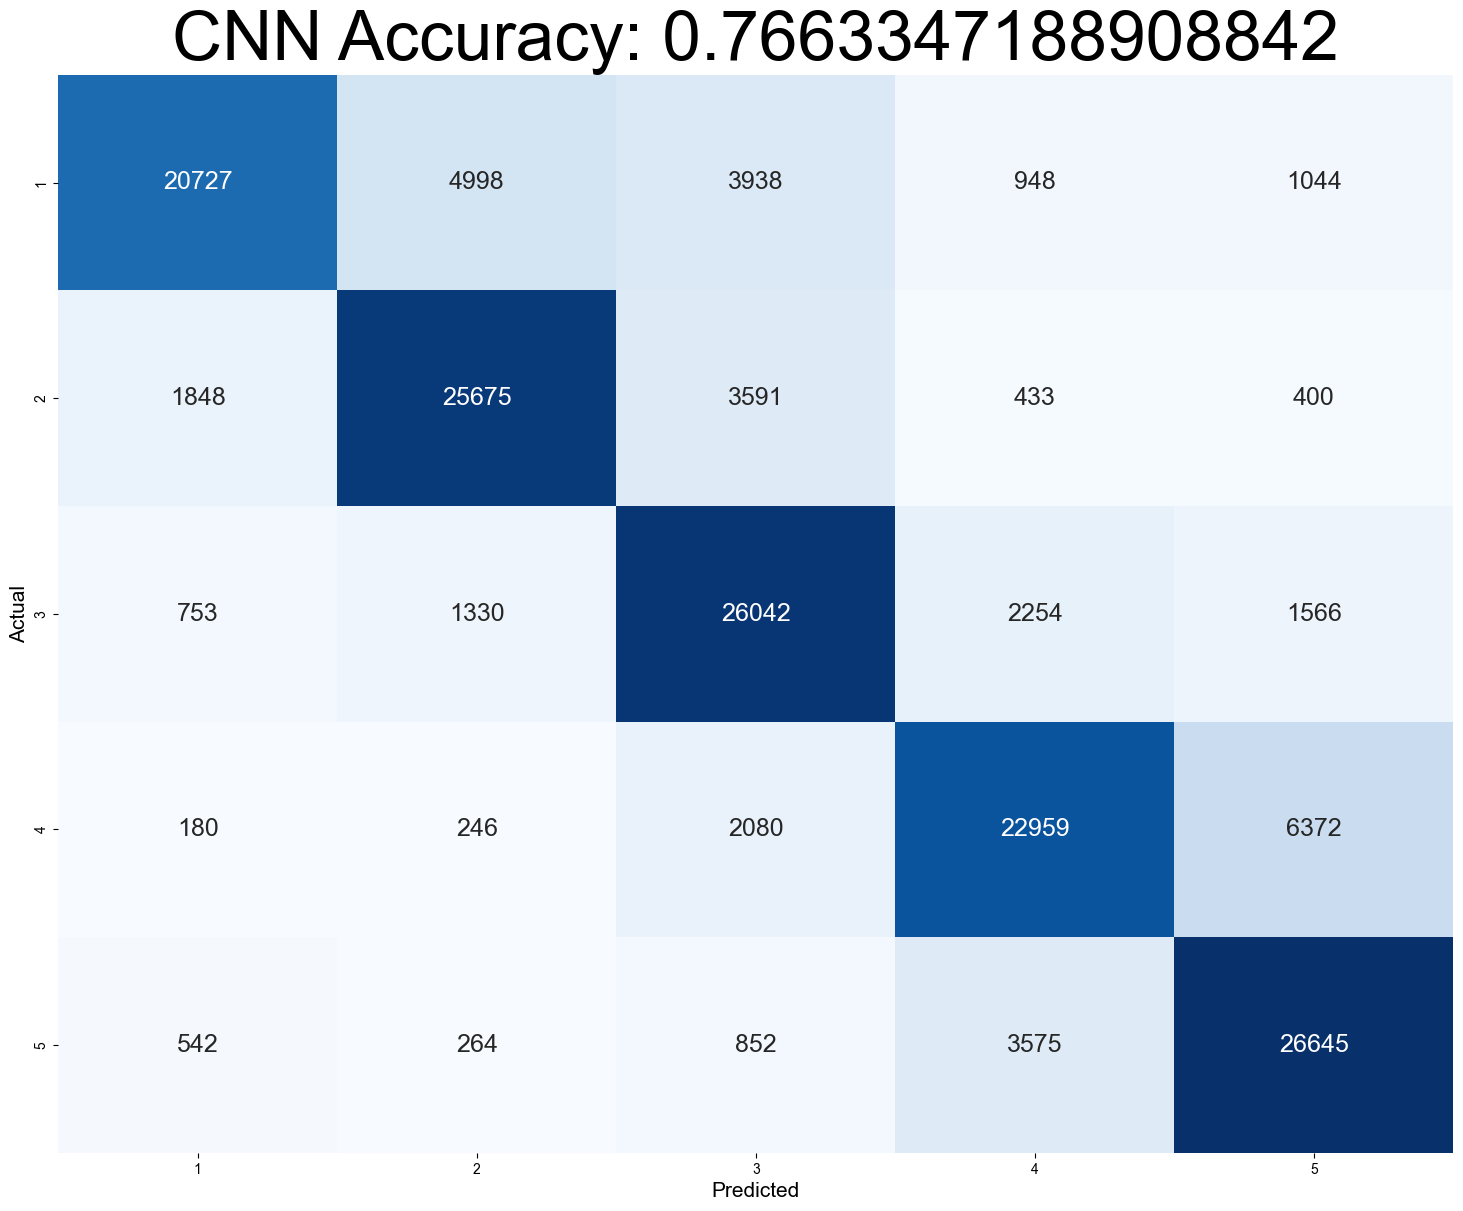

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
cnn_accuracy = accuracy_score(Y_test.argmax(axis=-1),ypred2.argmax(axis=-1))
print("CNN Accuracy:",cnn_accuracy)
cnn_cn = confusion_matrix(Y_test.argmax(axis=-1),ypred2.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.set(font_scale=1.5)
sns.heatmap(cnn_cn,annot=True,fmt="g", cmap='Blues',cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("CNN Accuracy: {}".format(cnn_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

In [24]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('\n Clasification report:\n', classification_report(Y_test.argmax(axis=-1),ypred2.argmax(axis=-1),digits=4))


 Clasification report:
               precision    recall  f1-score   support

           0     0.8618    0.6548    0.7442     31655
           1     0.7897    0.8037    0.7966     31947
           2     0.7134    0.8152    0.7609     31945
           3     0.7610    0.7211    0.7405     31837
           4     0.7396    0.8358    0.7848     31878

    accuracy                         0.7663    159262
   macro avg     0.7731    0.7661    0.7654    159262
weighted avg     0.7730    0.7663    0.7655    159262



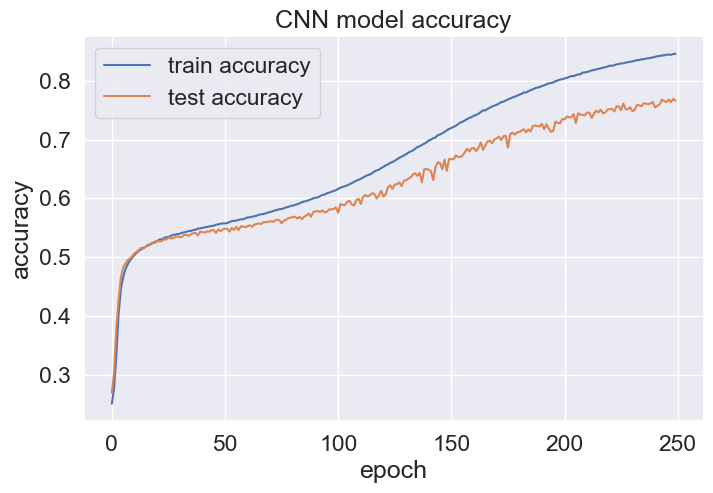

In [25]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.set_facecolor("#eaeaf2")
plt.plot(history.history['accuracy'],label="train accuracy")
plt.plot(history.history['val_accuracy'],label="test accuracy")
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(color = 'w')
# plt.savefig('CNN_accuracy_CNN_relu-test',dpi=200); 
plt.show()


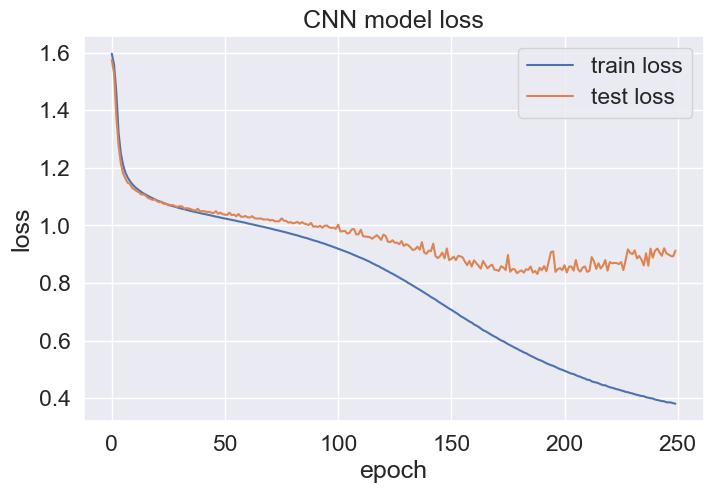

In [26]:
plt.figure(figsize=(8, 5))

ax = plt.axes()
ax.set_facecolor("#eaeaf2")
plt.plot(history.history['loss'],label="train loss")
plt.plot(history.history['val_loss'],label="test loss")
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(color = 'w')
# plt.savefig('CNN_loss_CNN_relu-test',dpi=200); 
plt.show()

4977/4977 [==============================] - 19s 4ms/step


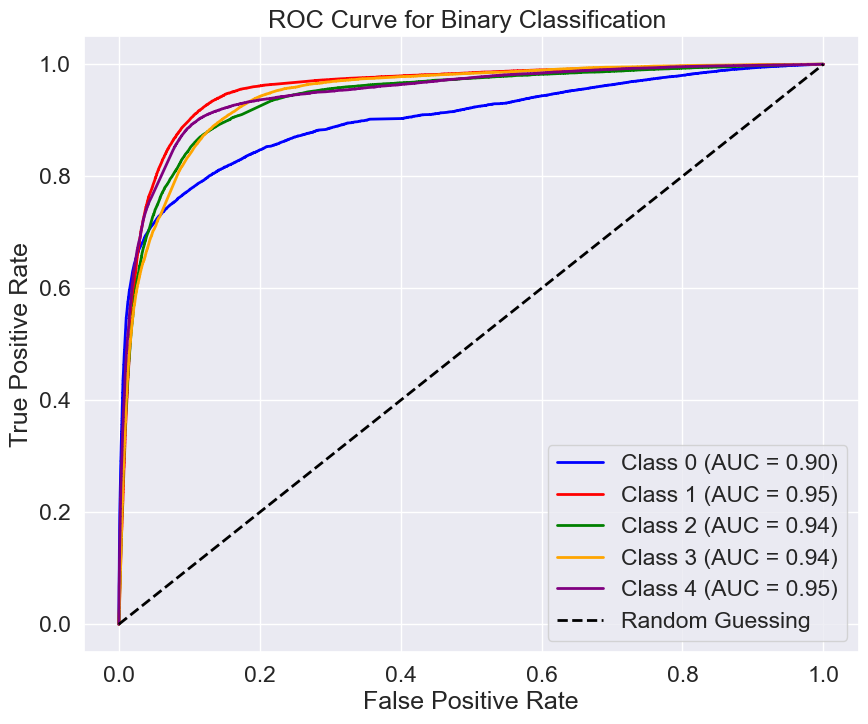

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from itertools import cycle


# Binarize the labels
# Assuming `y_test` contains the true labels for your test set
# Replace with your actual test labels
# y_test_bin = label_binarize(Y_test, classes=[1, 2, 3, 4, 5] )# Specify your class labels

y_true = Y_test  # Replace with your true labels
y_score = cnn_model.predict(X_test) # Replace with your predicted scores

y_true_binary = label_binarize(y_true, classes=[1, 2, 3, 4, 5])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Add more colors if you have more classes

for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification ')
plt.legend(loc='lower right')
plt.show()

In [28]:
#test#